# Kevin Martin & Jeffrey Alexovich CIS600 - Sunday @ 9:00pm EST

Final Project

Dataset used: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>
Use multiple classification algorithms to determine the quality of red wines based on a variety of characteristics.

## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

The dataset has almost 1,600 records and 11 columns of data, and it appears to be very complete. There are no missing records, duplicate records, redundant columns, or irrelevant columns. Furthermore, all the features are numeric, which should aid in the success of our classification algorithms.

However, with only 1,600 records we may not have enough to generate accurate models. We do not expect this to be a problem but are aware of this fact.

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Identifying attributes that are more likely to predict the quality of wine
- Classify wine into a binary "good" or "bad" category
- Classify wine into multiple categories based on their objective "quality" score


**Data mining success criteria**
- Clean and prepare the data so no false conclusions are reached (avoiding the "garbage-in-garbage-out" paradigm)
- Avoid erroneous patterns and bring errors down to an acceptable level

 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- Our ultimate goal is to predict whether or not we can predict the quality of a wine given its unique features.

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a> 

In [29]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import nan
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [3]:
#Data source: 
#Source Query location: 
red_data = './datasets_4458_8204_winequality-red.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(red_data, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
The data has 12 columns, all of which are numeric. The final column, "quality", is the target column, which is rating from 1-10 of quality (1 being the worst and 10 being the best).

Additionally, all the feature columns are of type float, while the target column is of type int. This will make it easier to select the features as we will simply omit the single int column.

In [72]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Data shape:')
print(df.shape)
print(df.info())

Data shape:
(1599, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB
None


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data is extremly complete, without any missing values. As such, no further cleaning needs to be done here.

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df))


The selections has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [7]:
# Get the columns with > 50% missing
missing_train = missing_values_table(df);
miss_col_train = list(missing_train[missing_train['% of Total Values'] > 50].index)
print('There are %d columns missing more than half the data.' % len(miss_col_train))


The selections has 12 columns.
There are 0 columns that have missing values.
There are 0 columns missing more than half the data.


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at the fields using a standard box-and-whisker plot, observing visually those data points which may need to be removed.

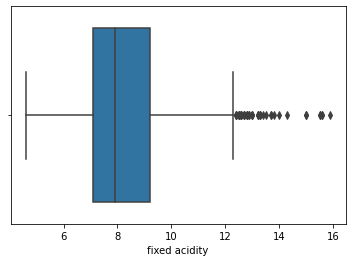

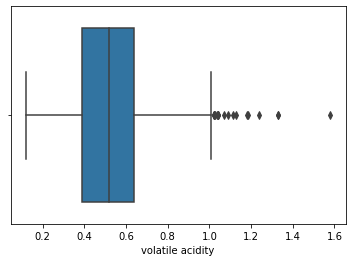

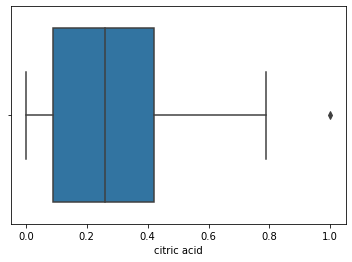

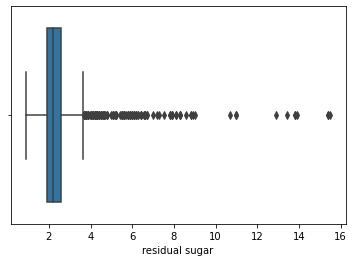

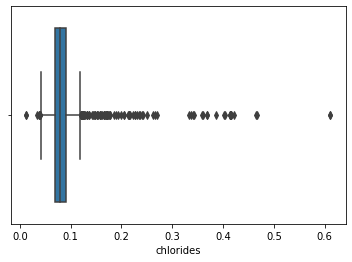

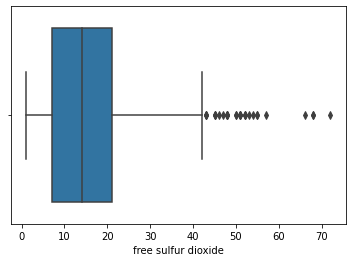

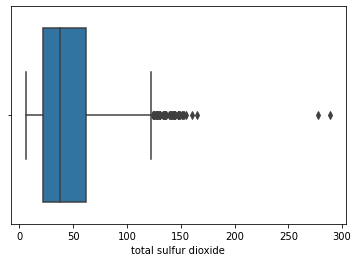

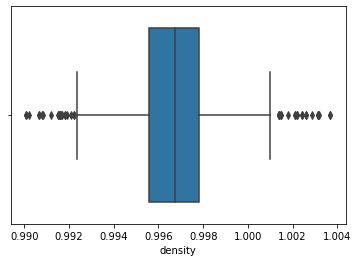

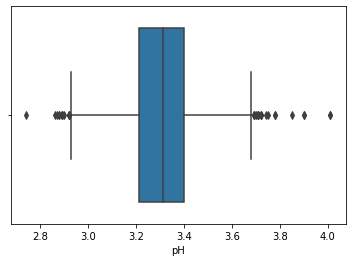

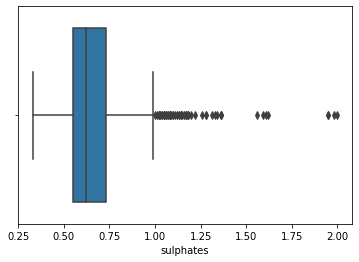

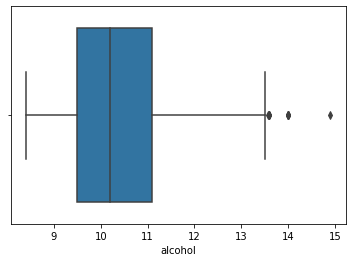

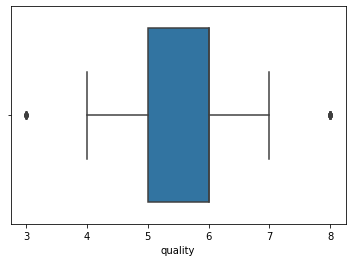

In [8]:
for col in df:
    sns.boxplot(x=df[col])
    plt.show()

While see what could be considered outliers, note the relative scales for each graph. None of the data points are completely out of line (as in an order of magnitude off), and we feel confident in leaving the dataset untouched in this regard.

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of quality, consider a simple histogram. It is immediately clear that the vast majority of wines are in the right in the middle. We see few wines that are on the edges as very high quality or very poor quality.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

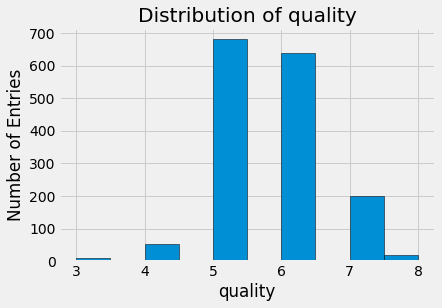

In [11]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df, 'quality')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
To get a general sense of corrleations, a heatmap across all vairables as compared to all others was generated. Clearly, there are some moderatey correlated attributes, but to the point of quality, a more focused list of correlations was generated. Here, we can see the more relevant relationships and begin to map out where the focus of the analysis will be directed. 

<Figure size 1440x1440 with 0 Axes>

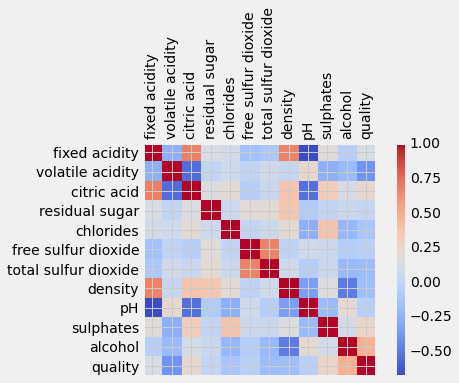

In [13]:
fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [14]:
corr_data = df[df.columns[1:]].corr()['quality'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Data Selection <a class="anchor" id="Selectyourdata"></a>
We will be using 100% of the available data, and splitting it into train/test sets in section 4.

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.1 Altering Data Types and Dealing with Zeros <a class="anchor" id="AlteringDatatypes"></a>
There is no need to alter any data types, nor deal with excessive zeros.

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [15]:
print('Original shape of data')
print(df.shape)
print('Shape after removing duplicates')
df.drop_duplicates(keep='first')
print(df.shape)

Original shape of data
(1599, 12)
Shape after removing duplicates
(1599, 12)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.2.3 Missing Values
No missing values to address.

In [16]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1599, 12)
(1599, 12)


# 4. Model Training/Testing<a class="anchor" id="Modeltrain"></a>

## 4.1 Multi-Class Testing

In [80]:
"""
'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).
"""

metric_eval = 'macro'

num_vars = df.select_dtypes(['float64']).columns
print('Columns to check: ', num_vars)
x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

def evaluate(model, graph_flag):
    out_mod = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print ("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:",metrics.precision_score(y_test, y_pred, average=metric_eval))
    print("Recall:",metrics.recall_score(y_test, y_pred, average=metric_eval))
    print("F1:", metrics.f1_score(y_test,y_pred, average=metric_eval))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm)
        sns.heatmap(cm)
    return out_mod

Columns to check:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [76]:
gnb = GaussianNB()
gnb_train = evaluate(gnb, 0)

Accuracy: 0.5208333333333334
Precision: 0.3296248216351309
Recall: 0.3655895691609978
F1: 0.34287496129601386


In [77]:
dtc = DecisionTreeClassifier()
evaluate(dtc, 0)

Accuracy: 0.5833333333333334
Precision: 0.3154904973816946
Recall: 0.309546485260771
F1: 0.3107857997501461


DecisionTreeClassifier()

In [78]:
xgb = XGBClassifier()
xgb_train = evaluate(xgb, 0)

Accuracy: 0.6375
Precision: 0.3628652429081943
Recall: 0.33708616780045353
F1: 0.3382029474068298


In [79]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_train = evaluate(rfc, 0)

Accuracy: 0.625
Precision: 0.3439628650892015
Recall: 0.3084807256235827
F1: 0.31516027831817306


## 4.2 Binary Classification
Classifying wines as either "good" or "bad", with a rating over greater than or equal to 6 indicating good.

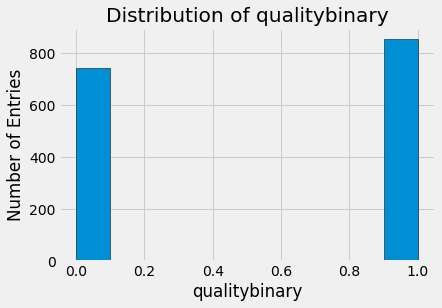

In [49]:
df2 = df.copy()
df2['qualitybinary'] = np.where(df2['quality']>=6,1,0)
hist_chart(df2, 'qualitybinary')

In [50]:
corr_data2 = df2[df2.columns[1:]].corr()['qualitybinary'][:]
sorted_corr_data2 = corr_data2.sort_values(kind="quicksort")
print(sorted_corr_data2)

volatile acidity       -0.321441
total sulfur dioxide   -0.231963
density                -0.159110
chlorides              -0.109494
free sulfur dioxide    -0.061757
pH                     -0.003264
residual sugar         -0.002160
citric acid             0.159129
sulphates               0.218072
alcohol                 0.434751
quality                 0.848279
qualitybinary           1.000000
Name: qualitybinary, dtype: float64


In [65]:
num_vars_bin = df2.select_dtypes(['float64']).columns
print('Columns to check: ', num_vars_bin)
x_bin = df2[num_vars_bin]
y_bin = df2.qualitybinary

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin, y_bin, test_size=0.3, random_state=16)

scaler_bin = StandardScaler().fit(x_train_bin)
x_train_bin = scaler.transform(x_train_bin)
x_test_bin = scaler.transform(x_test_bin)

def evaluate_bin(model, graph_flag):
    out_bin = model.fit(x_train_bin, y_train_bin)
    y_pred_bin = model.predict(x_test_bin)
    cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
    print ("Accuracy:", accuracy_score(y_test_bin, y_pred_bin)) 
    print("Precision:",metrics.precision_score(y_test_bin, y_pred_bin))
    print("Recall:",metrics.recall_score(y_test_bin, y_pred_bin))
    print("F1:", metrics.f1_score(y_test_bin,y_pred_bin))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm_bin)
        sns.heatmap(cm_bin)
    return out_bin

Columns to check:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [66]:
gnb_bin = GaussianNB()
gnb_train_bin = evaluate_bin(gnb_bin, 0)

Accuracy: 0.7041666666666667
Precision: 0.7142857142857143
Recall: 0.7421875
F1: 0.7279693486590038


In [67]:
dtc_bin = DecisionTreeClassifier()
dtc_train_bin = evaluate_bin(dtc_bin, 0)

Accuracy: 0.7166666666666667
Precision: 0.7238805970149254
Recall: 0.7578125
F1: 0.7404580152671756


In [68]:
xgb_bin = XGBClassifier()
xgb_train_bin = evaluate_bin(xgb_bin, 0)

Accuracy: 0.7708333333333334
Precision: 0.7703703703703704
Recall: 0.8125
F1: 0.7908745247148289


In [69]:
rfc_bin = RandomForestClassifier(n_estimators=10)
rfc_train_bin = evaluate_bin(rfc_bin, 0)

Accuracy: 0.7604166666666666
Precision: 0.7877551020408163
Recall: 0.75390625
F1: 0.7704590818363273


In [70]:
#Set up the grid search for a decision tree approach
sc = StandardScaler()
pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline for the tree
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

#Set the parameters to test
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

#Check best parameters
clf_G = GridSearchCV(pipe, parameters)
clf_G.fit(x_bin, y_bin)

#View The Best Parameters
print('Best Criterion:', clf_G.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf_G.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf_G.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_G.best_estimator_.get_params()['decisiontree'])

#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf_G, x_bin, y_bin, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 9

DecisionTreeClassifier(max_depth=6)

[0.66       0.6375     0.755      0.69674185]

0.6873104636591478

0.04443469416184238


In [71]:
#Create a new algorithm based on optimized grid search parameters
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf2_train_bin = evaluate_bin(clf2, 0)

Accuracy: 0.7166666666666667
Precision: 0.7362204724409449
Recall: 0.73046875
F1: 0.7333333333333334


# 5 Analysis <a class="anchor" id="Analysis"></a>


# 6. Conclusion <a class="anchor" id="Conclusion"></a>
